In [5]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [4]:
using JSON

fcoeffs_Jan_AM = readall("../temp_files/fcoeffs_Jan_AM.json")
fcoeffs_Jan_AM = JSON.parse(JSON.parse(fcoeffs_Jan_AM))

fcoeffs_Jan_MD = readall("../temp_files/fcoeffs_Jan_MD.json")
fcoeffs_Jan_MD = JSON.parse(JSON.parse(fcoeffs_Jan_MD))

fcoeffs_Jan_PM = readall("../temp_files/fcoeffs_Jan_PM.json")
fcoeffs_Jan_PM = JSON.parse(JSON.parse(fcoeffs_Jan_PM))

fcoeffs_Jan_weekend = readall("../temp_files/fcoeffs_Jan_weekend.json")
fcoeffs_Jan_weekend = JSON.parse(JSON.parse(fcoeffs_Jan_weekend))

Dict{String,Any} with 2 entries:
  "fcoeffs8" => {0.32442071692244906,1.0336747428056587,0.8299608767225405,-0.3…
  "fcoeffs9" => {0.25942124739143607,0.9615755831230484,1.1078330771314373,-0.3…

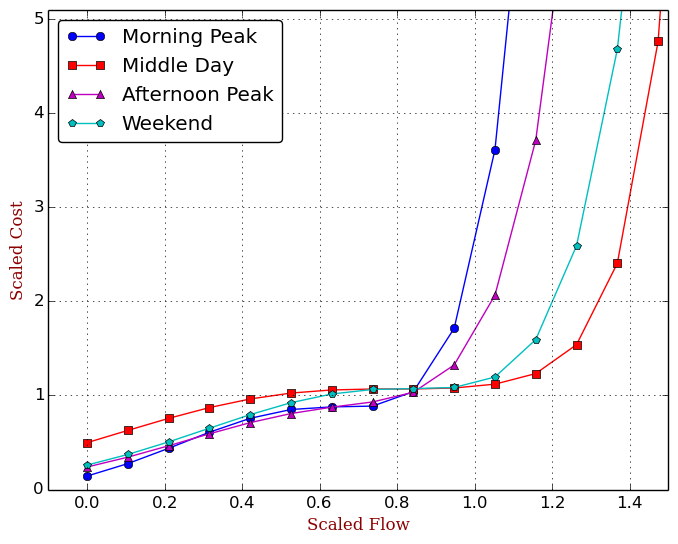

In [29]:
using PyPlot

fcoeffs_AM = fcoeffs_Jan_AM["fcoeffs9"]
fcoeffs_MD = fcoeffs_Jan_MD["fcoeffs9"]
fcoeffs_PM = fcoeffs_Jan_PM["fcoeffs9"]
fcoeffs_weekend = fcoeffs_Jan_weekend["fcoeffs9"]


xs = linspace(0, 2, 20)
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#ys6 = map(x->polyEval(fcoeffs6, x), xs)
#ys7 = map(x->polyEval(fcoeffs7, x), xs)
ys_AM = map(x->polyEval(fcoeffs_AM, x), xs)
ys_MD = map(x->polyEval(fcoeffs_MD, x), xs)
ys_PM = map(x->polyEval(fcoeffs_PM, x), xs)
ys_weekend = map(x->polyEval(fcoeffs_weekend, x), xs)

# ys = map(x->polyEval(fcoeffs, x), xs)

#plot(xs, ys_true, "k", label="True")
#plot(xs, ys6, "o-c", label="deg=6")
#plot(xs, ys7, "s-r", label="deg=7")
plot(xs, ys_AM, "o-b", label="Morning Peak")
plot(xs, ys_MD, "s-r", label="Middle Day")
plot(xs, ys_PM, "^-m", label="Afternoon Peak")
plot(xs, ys_weekend, "p-c", label="Weekend")
legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 1.5, 0.01);
ylim(0.0, 5.1, 0.01);

font1 = ["family"=>"serif",
    "color"=>"darkred",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison.pdf")